In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [37]:
train_images.shape, train_labels

((60000, 28, 28), array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [38]:
test_images.shape, test_labels

((10000, 28, 28), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

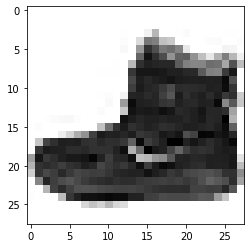

In [39]:
fashion = train_images[0]

plt.imshow(fashion, cmap=plt.cm.binary)
plt.show()

In [40]:
from keras import models
from keras import layers

In [41]:
network = models.Sequential()

network.add(layers.Flatten(input_shape=(28, 28)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [42]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [44]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [45]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5545 - accuracy: 0.8033
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3788 - accuracy: 0.8606
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3367 - accuracy: 0.8762
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3082 - accuracy: 0.8856
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2906 - accuracy: 0.8937


In [46]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 475us/step - loss: 0.3732 - accuracy: 0.8706


In [47]:
print('test_acc:', test_acc)

test_acc: 0.8705999851226807
